In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

np.random.seed(1337)  # for reproducibility

In [7]:

def load_dataset(file_train, file_validate, file_test):
    df_train = pd.read_excel(file_train,header=None)

    X_train, Y_train = format_data(df_train)

    df_test = pd.read_excel(file_test,header=None)

    X_test, Y_test = format_data(df_test)



    df_validate = pd.read_excel(file_validate,header=None)

    X_validate, Y_validate = format_data(df_validate)



    return X_train, Y_train, X_validate, Y_validate, X_test, Y_test


def format_data(df):
    X = np.array(df.drop(df.columns[-1], 1))


    Y = np.array(df[df.columns[-1]])
  
    Y=Y-1

    return X,Y


In [8]:
train_set_file = 'trainset_P135_60.xls'

validate_set_file = 'cvset_P12345_20.xls'

test_set_file = 'testset_P12345_20.xls'


X_train, Y_train, X_validate, Y_validate, X_test, Y_test = load_dataset(train_set_file, validate_set_file , test_set_file)



In [10]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

print(X_validate.shape)
print(Y_validate.shape)

(19776, 42)
(19776,)
(7040, 42)
(7040,)
(7040, 42)
(7040,)


In [21]:
no_of_classes=np.unique(Y_train).size
no_of_classes

8

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.fit_transform(X_validate)
X_test = scaler.fit_transform(X_test)

In [12]:
C=[0.1, 1, 100, 1000]
gamma=['scale','auto', 0.00001, 0.0001, 0.001,0.01,0.1,1,5,10]

accuracy_list=[]
max_acc=0

iter=1
for i in C:
    for j in gamma:
        print('*'*50)
        print('iteration ' + str(iter))
        svm_clf = SVC(kernel = 'rbf', C = i, gamma= j, class_weight = 'balanced', random_state = 0)
        svm_clf.fit(X_train, Y_train)
        Y_predict = svm_clf.predict(X_validate)
        temp_acc=accuracy_score(Y_validate, Y_predict)
        accuracy_list.append(temp_acc)
        if temp_acc>max_acc:
            max_acc=temp_acc
            C_best=i
            gamma_best=j
            print('accuracy:'+str(max_acc))
            print('C:'+str(i))
            print('gamma:'+str(j))
        else:
            pass
        iter = iter + 1
print('Best parameters:')
print('C:'+str(C_best))
print('gamma:'+str(gamma_best))

**************************************************
iteration 1
accuracy:0.9717329545454545
C:0.1
gamma:scale
**************************************************
iteration 2
**************************************************
iteration 3
**************************************************
iteration 4
**************************************************
iteration 5
**************************************************
iteration 6
**************************************************
iteration 7
**************************************************
iteration 8
**************************************************
iteration 9
**************************************************
iteration 10
**************************************************
iteration 11
accuracy:0.9789772727272728
C:1
gamma:scale
**************************************************
iteration 12
**************************************************
iteration 13
**************************************************
iteration 14
***********************

# ovr model evaluation

In [12]:
X_train=np.concatenate((X_train, X_validate), axis=0)

In [13]:
Y_train=np.concatenate((Y_train, Y_validate), axis=0)

In [29]:
ovr_svm_clf = SVC(kernel = 'rbf', C = 1, gamma= 'auto', class_weight = 'balanced', random_state = 0,  probability=True)

In [31]:
ovr_svm_clf.fit(X_train, Y_train)

SVC(C=1, class_weight='balanced', gamma='auto', probability=True,
    random_state=0)

In [32]:
Y_predict = ovr_svm_clf.predict(X_test)

In [33]:
print(classification_report(Y_test, Y_predict, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       879
           1     0.9989    1.0000    0.9994       888
           2     0.9943    0.9977    0.9960       878
           3     0.9535    0.9599    0.9567       897
           4     1.0000    0.9989    0.9994       874
           5     0.9843    0.9943    0.9893       883
           6     0.9603    0.9421    0.9511       898
           7     1.0000    0.9988    0.9994       843

    accuracy                         0.9862      7040
   macro avg     0.9864    0.9865    0.9864      7040
weighted avg     0.9862    0.9862    0.9862      7040



In [34]:
acc=accuracy_score(Y_test, Y_predict)
print(acc)

0.9862215909090909


In [20]:
Y_score = ovr_svm_clf.predict_proba(X_test)

In [22]:
Y_test_bin= label_binarize(Y_test, classes=[*range(no_of_classes)])

range(0, 8)


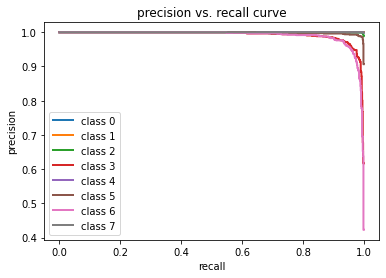

In [23]:
# precision recall curve
precision = dict()
recall = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:,i],Y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

range(0, 8)


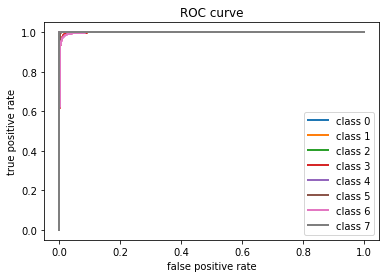

In [24]:
# roc curve
fpr = dict()
tpr = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i],Y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()